# Image Recognition Project - *FACE MASK DETECTION* (CNN)

**Description:**

Face Mask Detection is one of the useful and high in demand usecase in recent times due to the Covid-19 disaster.

Recently it has been made mandatory for public to wear a mask continously. Places such as Airports, Hospitals, Malls, etc doesn't allows one to enter if found without the Mask. And also there are countries where wearing mask had been made compulsory and fine has been imposed if found without the Mask.

As it was difficult to keep a track of such scenario. This Image Recognition software came into picture which made it easier to detect whether a person is wearing a mask or not.

**About Dataset:**

The Dataset contains images of people wearing masks and people not wearing masks. The database contains 10,000 colored images in the training folder, 800 images in the validation folder, and 992 images in the test folder.

**With Mask:**
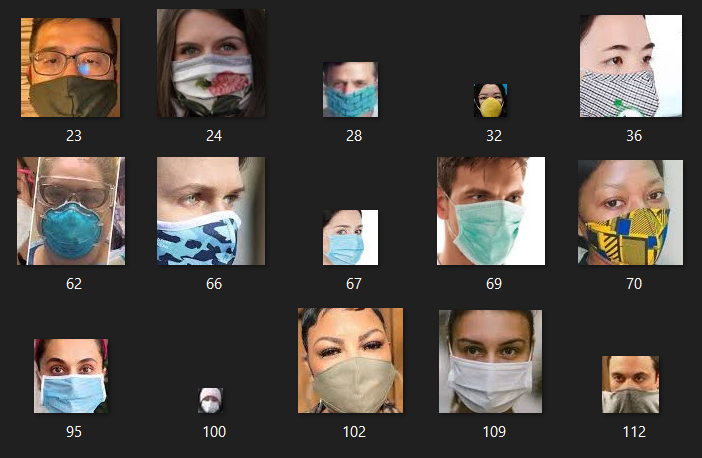

**Without Mask:**
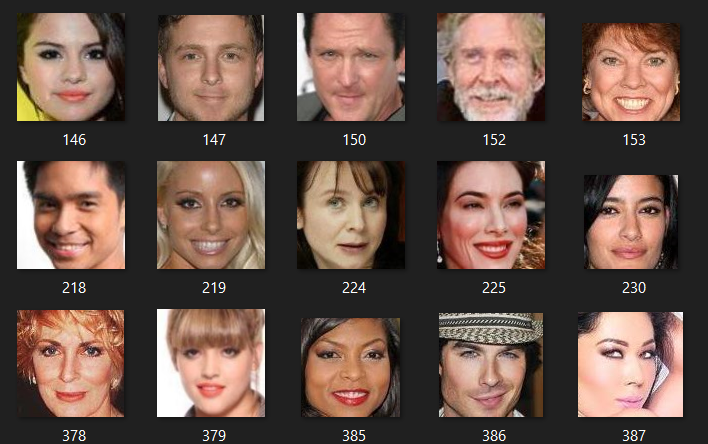

**Task:**

Your task is to create a CNN model for identifying whether a person in the image is wearing a mask or not.

Please perform the following tasks:

- Download the database, You can download it from Kaggle.
- Create test, train, and validation directory variables
- Create train and validation data generator with target size (128,128)
- Train a CNN model
- Train a model with VGG19 model
- Use callbacks to save your model at every step
- Training may take several hours, so use 5 to 10 epochs only.

In [1]:
# Importing Important Libraries
import os
import numpy as np
import pandas as pd
#import matpotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

The Dataset contains images of people wearing masks and people not wearing masks. The database contains 10,000 colored images in the training folder, 800 images in the validation folder, and 992 images in the test folder.

In [3]:
# Creating test, train, and validation directory variables
train_dir = r"C:\Users\TheWhiteWolf\Deep Learning\01 Module\Face Mask Detection\Train"
validation_dir = r"C:\Users\TheWhiteWolf\Deep Learning\01 Module\Face Mask Detection\Validation"
test_dir = r"C:\Users\TheWhiteWolf\Deep Learning\01 Module\Face Mask Detection\Test"

### Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [5]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size = (128, 128),
                batch_size = 20,
                class_mode = 'binary')

validation_generator = valid_datagen.flow_from_directory(
                validation_dir,
                target_size = (128, 128),
                batch_size = 20,
                class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Creating CNN Model

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [8]:
# Creating CNN Model
model = models.Sequential()

# Adding 1st Convonutional Layer
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(layers.MaxPooling2D(2, 2))

# Adding 2nd Convonutional Layer
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

# Adding 3rd Convonutional Layer
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

# Adding 4th Convonutional Layer
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

# Using Flatten on Model
model.add(layers.Flatten())

# Adding Single Dense Layer
model.add(layers.Dense(512, activation = 'relu'))

# Output Layer
model.add(layers.Dense(1, activation = 'sigmoid'))

In [9]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [10]:
# Compiling the Model
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy', # binary_crossentropy since we have 2 different classes (sparse_categorical_crossentropy if >2 classes)
              optimizer = optimizers.RMSprop(learning_rate = 1e-4), # Changing (default = 0.01) learning rate to 0.001
              metrics = ['acc'])

In [11]:
# Saving the Best Call Back only
checkpoint_bcb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only = True)

In [12]:
early_stopping_bcb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

# patience : Number of epochs with no improvement after which training will be stopped.

In [13]:
# Fit the training data
history = model.fit(
        train_generator,
        epochs = 20,
        validation_data = validation_generator,
        callbacks = [checkpoint_bcb, early_stopping_bcb])

Epoch 1/20
500/500 [==============================] - 174s 345ms/step - loss: 0.2090 - acc: 0.9153 - val_loss: 0.1075 - val_acc: 0.9575
Epoch 2/20
500/500 [==============================] - 161s 321ms/step - loss: 0.0730 - acc: 0.9746 - val_loss: 0.0313 - val_acc: 0.9862
Epoch 3/20
500/500 [==============================] - 162s 323ms/step - loss: 0.0392 - acc: 0.9861 - val_loss: 0.0197 - val_acc: 0.9925
Epoch 4/20
500/500 [==============================] - 161s 322ms/step - loss: 0.0302 - acc: 0.9887 - val_loss: 0.0133 - val_acc: 0.9925
Epoch 5/20
500/500 [==============================] - 162s 324ms/step - loss: 0.0260 - acc: 0.9913 - val_loss: 0.0120 - val_acc: 0.9937
Epoch 6/20
500/500 [==============================] - 160s 320ms/step - loss: 0.0225 - acc: 0.9924 - val_loss: 0.0191 - val_acc: 0.9950
Epoch 7/20
500/500 [==============================] - 159s 319ms/step - loss: 0.0174 - acc: 0.9940 - val_loss: 0.0178 - val_acc: 0.9950
Epoch 8/20
500/500 [============================

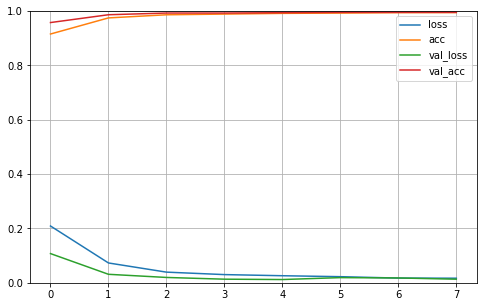

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
# Saving the Model
#model.save("model.h5")

In [16]:
# Displaying our current directory
%pwd

'C:\\Users\\TheWhiteWolf\\Deep Learning\\01 Module\\Face Mask Detection'

In [ ]:
# To change the directory
# %cd C:\\Users\\................

In [15]:
test_generator = valid_datagen.flow_from_directory(
                test_dir,
                target_size = (128, 128),
                batch_size = 20,
                class_mode = 'binary')

Found 992 images belonging to 2 classes.


In [16]:
model.evaluate(test_generator)

50/50 [==============================] - 5s 88ms/step - loss: 0.0172 - acc: 0.9940


[0.017207521945238113, 0.9939516186714172]

### Our CNN Model: Loss - 0.0172, Accuracy - 99% .

In [17]:
# Clearing the Session and Deleting the Model
from tensorflow.keras import backend as K

K.clear_session()
del model

## VGG19 Model

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale = 1. / 255)
valid_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (128,128),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = valid_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (128,128),
                    batch_size = 20,
                    class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [21]:
# To use Conv base of VVG19 importing from keras
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights = 'imagenet',  # Using final weights of model from ISLVRC competition named 'imagenet'
                 include_top = False,  # Only importing the conv base from the model
                 input_shape = (128, 128, 3))

In [22]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [23]:
model = models.Sequential()
model.add(conv_base)  # adding our conv base model instead of adding convonutional layer
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [22]:
# For Freezing the layer if you don't want to train the weights from VGG16 layer
# (In our case the trainable parameter 14714688 will turn to 0 & our model will not try to optimize the weights of that layer)
# It will significantly reduce the number of trainable parameters in our model & significantly improve our execution time
# RUN BELOW CODE
#conv_base.trainable = False

In [29]:
# model.summary()

In [25]:
# Compiling the Model
from tensorflow.keras import optimizers
# Weights of the convolutional layers are already optimized & we just have to optimize in little steps according to our problem
# Since we are fine tuning it, we are not training it from randomly assigned weights. We can use small learning_rate

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate = 2e-5), #  (2*10^-5)
             metrics = ['acc'])

In [26]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_VGG19_Model-{epoch:02d}.h5")

In [27]:
# Fit the training data
history = model.fit(
        train_generator,
        epochs = 5,
        validation_data = validation_generator,
        callbacks = [checkpoint_cb])

Epoch 1/5
500/500 [==============================] - 2414s 5s/step - loss: 0.0314 - acc: 0.9863 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 2/5
500/500 [==============================] - 2318s 5s/step - loss: 0.0058 - acc: 0.9982 - val_loss: 7.8009e-05 - val_acc: 1.0000
Epoch 3/5
500/500 [==============================] - 2316s 5s/step - loss: 0.0034 - acc: 0.9985 - val_loss: 0.0063 - val_acc: 0.9987
Epoch 4/5
500/500 [==============================] - 2527s 5s/step - loss: 7.3890e-05 - acc: 1.0000 - val_loss: 9.9912e-05 - val_acc: 1.0000
Epoch 5/5
500/500 [==============================] - 2780s 6s/step - loss: 3.6081e-06 - acc: 1.0000 - val_loss: 1.5388e-04 - val_acc: 1.0000


In [28]:
model = keras.models.load_model('CNN_VGG19_Model-05.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [29]:
test_generator = valid_datagen.flow_from_directory(
                test_dir,
                target_size = (128, 128),
                batch_size = 20,
                class_mode = 'binary')

Found 992 images belonging to 2 classes.


In [30]:
model.evaluate(test_generator)

50/50 [==============================] - 60s 1s/step - loss: 0.0096 - acc: 0.9990


[0.00957581214606762, 0.9989919066429138]

### Pretrained VGG19 CNN Model: Loss - 0.0095, Accuracy - 99% .